In [1]:
import torch
import numpy as np
import random
import torch.nn as nn
import torch.nn.functional as F
import itertools
import pdb
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

import sys

sys.path.insert(0, './src')

from data import Dataset
from kernels import HMC_our, HMC_vanilla, Reverse_kernel
from models import Gen_network, Inf_network
from target import NN_bernoulli
from utils import plot_digit_samples, get_samples
from args import get_args

In [2]:
torchType = torch.float32

In [3]:
def set_seeds(rand_seed):
#     torch.cuda.manual_seed_all(rand_seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    torch.manual_seed(rand_seed)
    np.random.seed(rand_seed)
    random.seed(rand_seed)

seed = 1 # 1337 #
set_seeds(seed)

In [4]:
args = get_args()

In [5]:
encoder = Inf_network(kwargs=args).to(args.device)
target = NN_bernoulli(kwargs=args, model=Gen_network(args.z_dim, args), device=args.device).to(args.device)

if args.learnable_reverse:
    reverse_kernel = Reverse_kernel(kwargs=args).to(args.device)
    reverse_params = reverse_kernel.parameters()
else:
    reverse_params = list([])

if args.amortize:
    transitions = HMC_our(kwargs=args).to(args.device)
else:
    transitions = nn.ModuleList([HMC_our(kwargs=args).to(args.device) for _ in range(args['K'])])
    
for p in transitions.parameters():
    p.requires_grad_(False)

params = [encoder.parameters(), target.parameters(), transitions.parameters(), reverse_params]
optimizer = torch.optim.Adam(params=itertools.chain(*params), lr=1e-3)

In [6]:
dataset = Dataset(args, device=args.device)

In [7]:
random_code = args.std_normal.sample((64, args.z_dim))

  0%|          | 0/500 [00:00<?, ?it/s]

On batch number 1/100 and on k = 1 we have for  0: 0.5660000268835574 and for +1: 0.43400002061389387
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.49400002346374094 and for +1: 0.5060000240337104
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.49800002365373075 and for +1: 0.5020000238437206
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5040000239387155 and for +1: 0.49600002355873585
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.49200002336874604 and for +1: 0.5080000241287053
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 1 	 Current ELBO: -445.2521057128906
Saved samples to ./pics/mnist_epoch_0_K_5_N_2_amortize_True.png


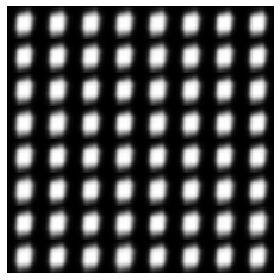

  0%|          | 1/500 [00:52<7:18:21, 52.71s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.49400002346374094 and for +1: 0.5060000240337104
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5320000252686441 and for +1: 0.4680000222288072
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.4780000227037817 and for +1: 0.5220000247936696
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5200000246986747 and for +1: 0.4800000227987766
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.48800002317875624 and for +1: 0.5120000243186951
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 2 	 Current ELBO: -425.4015808105469
Saved samples to ./pics/mnist_epoch_1_K_5_N_2_amortize_True.png


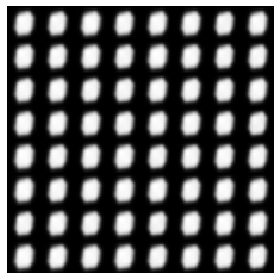

  0%|          | 2/500 [01:45<7:17:58, 52.77s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5160000245086849 and for +1: 0.48400002298876643
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.48600002308376133 and for +1: 0.51400002441369
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.49200002336874604 and for +1: 0.5080000241287053
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5000000237487257 and for +1: 0.5000000237487257
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5040000239387155 and for +1: 0.49600002355873585
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 3 	 Current ELBO: -433.8625183105469
Saved samples to ./pics/mnist_epoch_2_K_5_N_2_amortize_True.png


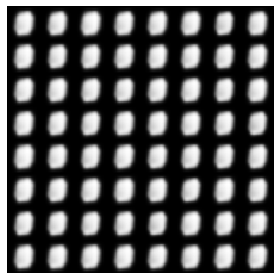

  1%|          | 3/500 [02:38<7:17:36, 52.83s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5120000243186951 and for +1: 0.48800002317875624
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5020000238437206 and for +1: 0.49800002365373075
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.48600002308376133 and for +1: 0.51400002441369
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.4620000219438225 and for +1: 0.5380000255536288
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5100000242237002 and for +1: 0.49000002327375114
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 4 	 Current ELBO: -435.5829772949219
Saved samples to ./pics/mnist_epoch_3_K_5_N_2_amortize_True.png


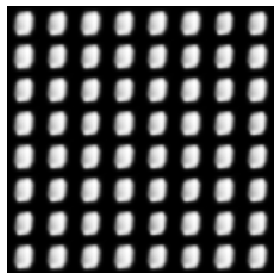

  1%|          | 4/500 [03:31<7:17:16, 52.90s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5080000241287053 and for +1: 0.49200002336874604
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5020000238437206 and for +1: 0.49800002365373075
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.51400002441369 and for +1: 0.48600002308376133
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5020000238437206 and for +1: 0.49800002365373075
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.48400002298876643 and for +1: 0.5160000245086849
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 5 	 Current ELBO: -430.0387268066406
Saved samples to ./pics/mnist_epoch_4_K_5_N_2_amortize_True.png


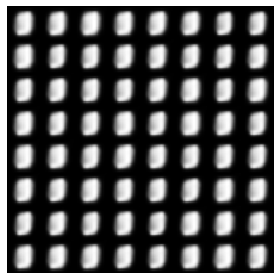

  1%|          | 5/500 [04:24<7:16:47, 52.94s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5280000250786543 and for +1: 0.472000022418797
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.49000002327375114 and for +1: 0.5100000242237002
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.5000000237487257 and for +1: 0.5000000237487257
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5000000237487257 and for +1: 0.5000000237487257
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.4700000223238021 and for +1: 0.5300000251736492
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 6 	 Current ELBO: -430.01019287109375
Saved samples to ./pics/mnist_epoch_5_K_5_N_2_amortize_True.png


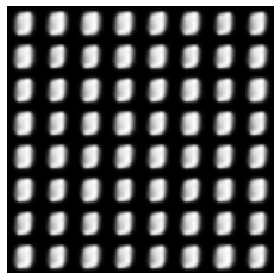

  1%|          | 6/500 [05:17<7:16:11, 52.98s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.4760000226087868 and for +1: 0.5240000248886645
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.51400002441369 and for +1: 0.48600002308376133
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.5080000241287053 and for +1: 0.49200002336874604
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5180000246036798 and for +1: 0.48200002289377153
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5280000250786543 and for +1: 0.472000022418797
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 7 	 Current ELBO: -435.1486511230469
Saved samples to ./pics/mnist_epoch_6_K_5_N_2_amortize_True.png


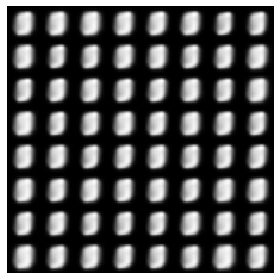

  1%|▏         | 7/500 [06:10<7:15:30, 53.00s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5220000247936696 and for +1: 0.4780000227037817
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.49400002346374094 and for +1: 0.5060000240337104
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.472000022418797 and for +1: 0.5280000250786543
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5080000241287053 and for +1: 0.49200002336874604
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5000000237487257 and for +1: 0.5000000237487257
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 8 	 Current ELBO: -423.73760986328125
Saved samples to ./pics/mnist_epoch_7_K_5_N_2_amortize_True.png


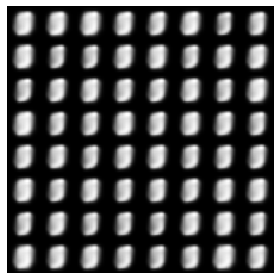

  2%|▏         | 8/500 [07:03<7:14:46, 53.02s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.4640000220388174 and for +1: 0.5360000254586339
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.4760000226087868 and for +1: 0.5240000248886645
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.5380000255536288 and for +1: 0.4620000219438225
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.4780000227037817 and for +1: 0.5220000247936696
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.49800002365373075 and for +1: 0.5020000238437206
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 9 	 Current ELBO: -417.1378173828125
Saved samples to ./pics/mnist_epoch_8_K_5_N_2_amortize_True.png


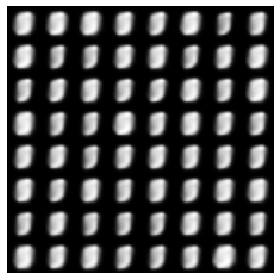

  2%|▏         | 9/500 [07:56<7:14:03, 53.04s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.49400002346374094 and for +1: 0.5060000240337104
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.4800000227987766 and for +1: 0.5200000246986747
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.51400002441369 and for +1: 0.48600002308376133
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5200000246986747 and for +1: 0.4800000227987766
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5460000259336084 and for +1: 0.4540000215638429
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 10 	 Current ELBO: -418.8083190917969
Saved samples to ./pics/mnist_epoch_9_K_5_N_2_amortize_True.png


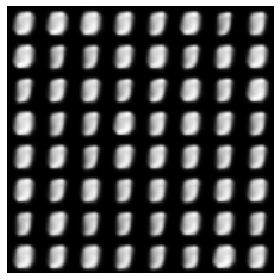

  2%|▏         | 10/500 [08:50<7:13:18, 53.06s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.4800000227987766 and for +1: 0.5200000246986747
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5300000251736492 and for +1: 0.4700000223238021
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.5100000242237002 and for +1: 0.49000002327375114
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5220000247936696 and for +1: 0.4780000227037817
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.49600002355873585 and for +1: 0.5040000239387155
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 11 	 Current ELBO: -423.78253173828125
Saved samples to ./pics/mnist_epoch_10_K_5_N_2_amortize_True.png


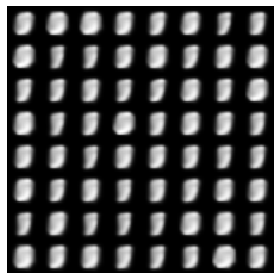

  2%|▏         | 11/500 [09:43<7:12:39, 53.09s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.49600002355873585 and for +1: 0.5040000239387155
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5100000242237002 and for +1: 0.49000002327375114
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.48600002308376133 and for +1: 0.51400002441369
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5100000242237002 and for +1: 0.49000002327375114
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.48800002317875624 and for +1: 0.5120000243186951
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 12 	 Current ELBO: -420.3235778808594
Saved samples to ./pics/mnist_epoch_11_K_5_N_2_amortize_True.png


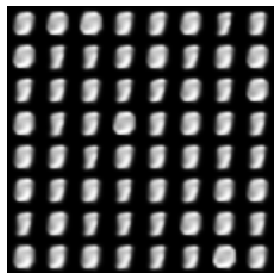

  2%|▏         | 12/500 [10:36<7:11:55, 53.11s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.49600002355873585 and for +1: 0.5040000239387155
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5080000241287053 and for +1: 0.49200002336874604
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.48400002298876643 and for +1: 0.5160000245086849
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.4760000226087868 and for +1: 0.5240000248886645
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5160000245086849 and for +1: 0.48400002298876643
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 13 	 Current ELBO: -419.99267578125
Saved samples to ./pics/mnist_epoch_12_K_5_N_2_amortize_True.png


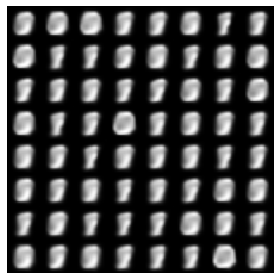

  3%|▎         | 13/500 [11:29<7:11:02, 53.11s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.4600000218488276 and for +1: 0.5400000256486237
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5400000256486237 and for +1: 0.4600000218488276
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.5220000247936696 and for +1: 0.4780000227037817
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5180000246036798 and for +1: 0.48200002289377153
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.48200002289377153 and for +1: 0.5180000246036798
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 14 	 Current ELBO: -444.91583251953125
Saved samples to ./pics/mnist_epoch_13_K_5_N_2_amortize_True.png


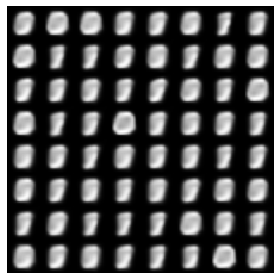

  3%|▎         | 14/500 [12:22<7:10:04, 53.10s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5180000246036798 and for +1: 0.48200002289377153
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.49800002365373075 and for +1: 0.5020000238437206
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.4600000218488276 and for +1: 0.5400000256486237
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.49000002327375114 and for +1: 0.5100000242237002
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5040000239387155 and for +1: 0.49600002355873585
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 15 	 Current ELBO: -418.2344970703125
Saved samples to ./pics/mnist_epoch_14_K_5_N_2_amortize_True.png


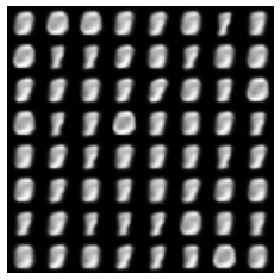

  3%|▎         | 15/500 [13:15<7:09:08, 53.09s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5100000242237002 and for +1: 0.49000002327375114
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5200000246986747 and for +1: 0.4800000227987766
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.48200002289377153 and for +1: 0.5180000246036798
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5180000246036798 and for +1: 0.48200002289377153
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5200000246986747 and for +1: 0.4800000227987766
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 16 	 Current ELBO: -407.4923400878906
Saved samples to ./pics/mnist_epoch_15_K_5_N_2_amortize_True.png


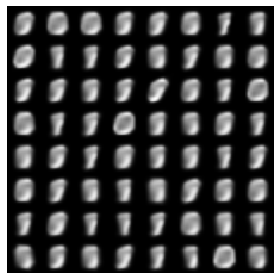

  3%|▎         | 16/500 [14:08<7:08:13, 53.09s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.48800002317875624 and for +1: 0.5120000243186951
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5020000238437206 and for +1: 0.49800002365373075
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.5040000239387155 and for +1: 0.49600002355873585
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5280000250786543 and for +1: 0.472000022418797
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.48200002289377153 and for +1: 0.5180000246036798
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 17 	 Current ELBO: -409.81915283203125
Saved samples to ./pics/mnist_epoch_16_K_5_N_2_amortize_True.png


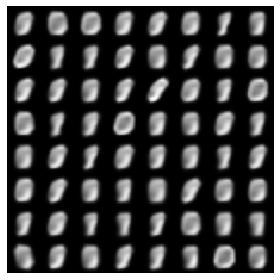

  3%|▎         | 17/500 [15:01<7:07:17, 53.08s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5500000261235982 and for +1: 0.4500000213738531
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.4780000227037817 and for +1: 0.5220000247936696
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.48200002289377153 and for +1: 0.5180000246036798
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.4760000226087868 and for +1: 0.5240000248886645
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5000000237487257 and for +1: 0.5000000237487257
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 18 	 Current ELBO: -416.209716796875
Saved samples to ./pics/mnist_epoch_17_K_5_N_2_amortize_True.png


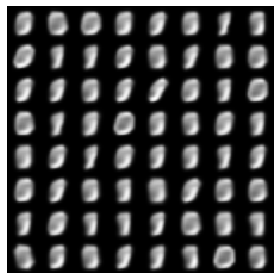

  4%|▎         | 18/500 [15:54<7:06:24, 53.08s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5060000240337104 and for +1: 0.49400002346374094
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5120000243186951 and for +1: 0.48800002317875624
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.5160000245086849 and for +1: 0.48400002298876643
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5060000240337104 and for +1: 0.49400002346374094
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5080000241287053 and for +1: 0.49200002336874604
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 19 	 Current ELBO: -409.7970886230469
Saved samples to ./pics/mnist_epoch_18_K_5_N_2_amortize_True.png


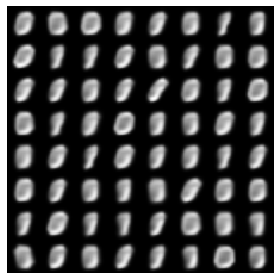

  4%|▍         | 19/500 [16:47<7:05:28, 53.07s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.4780000227037817 and for +1: 0.5220000247936696
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.48400002298876643 and for +1: 0.5160000245086849
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.5260000249836594 and for +1: 0.4740000225137919
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5300000251736492 and for +1: 0.4700000223238021
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5200000246986747 and for +1: 0.4800000227987766
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 20 	 Current ELBO: -409.4948425292969
Saved samples to ./pics/mnist_epoch_19_K_5_N_2_amortize_True.png


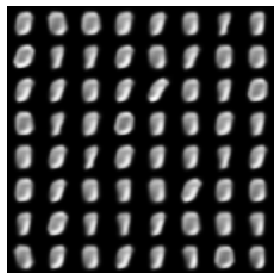

  4%|▍         | 20/500 [17:40<7:04:35, 53.07s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5060000240337104 and for +1: 0.49400002346374094
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5200000246986747 and for +1: 0.4800000227987766
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.49400002346374094 and for +1: 0.5060000240337104
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.48800002317875624 and for +1: 0.5120000243186951
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.4760000226087868 and for +1: 0.5240000248886645
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 21 	 Current ELBO: -411.7762145996094
Saved samples to ./pics/mnist_epoch_20_K_5_N_2_amortize_True.png


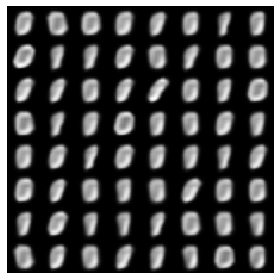

  4%|▍         | 21/500 [18:34<7:03:41, 53.07s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5160000245086849 and for +1: 0.48400002298876643
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.48200002289377153 and for +1: 0.5180000246036798
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.5080000241287053 and for +1: 0.49200002336874604
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5380000255536288 and for +1: 0.4620000219438225
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5280000250786543 and for +1: 0.472000022418797
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 22 	 Current ELBO: -412.1512756347656
Saved samples to ./pics/mnist_epoch_21_K_5_N_2_amortize_True.png


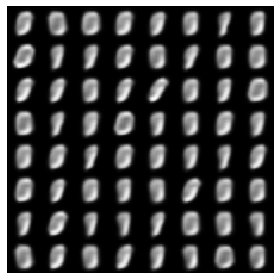

  4%|▍         | 22/500 [19:27<7:02:48, 53.07s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.49400002346374094 and for +1: 0.5060000240337104
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.4800000227987766 and for +1: 0.5200000246986747
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.49600002355873585 and for +1: 0.5040000239387155
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.48800002317875624 and for +1: 0.5120000243186951
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5240000248886645 and for +1: 0.4760000226087868
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 23 	 Current ELBO: -412.15191650390625
Saved samples to ./pics/mnist_epoch_22_K_5_N_2_amortize_True.png


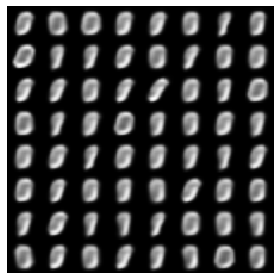

  5%|▍         | 23/500 [20:20<7:01:54, 53.07s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5160000245086849 and for +1: 0.48400002298876643
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5180000246036798 and for +1: 0.48200002289377153
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.5220000247936696 and for +1: 0.4780000227037817
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5020000238437206 and for +1: 0.49800002365373075
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.4740000225137919 and for +1: 0.5260000249836594
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 24 	 Current ELBO: -409.34393310546875
Saved samples to ./pics/mnist_epoch_23_K_5_N_2_amortize_True.png


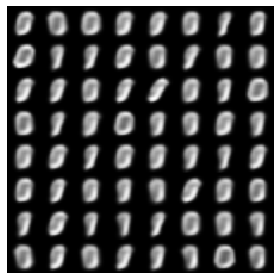

  5%|▍         | 24/500 [21:13<7:00:59, 53.07s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.4540000215638429 and for +1: 0.5460000259336084
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5020000238437206 and for +1: 0.49800002365373075
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.49800002365373075 and for +1: 0.5020000238437206
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.49000002327375114 and for +1: 0.5100000242237002
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5100000242237002 and for +1: 0.49000002327375114
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 25 	 Current ELBO: -409.7109375
Saved samples to ./pics/mnist_epoch_24_K_5_N_2_amortize_True.png


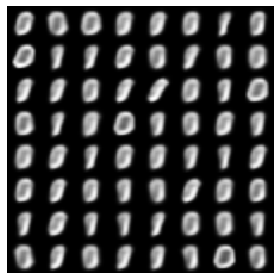

  5%|▌         | 25/500 [22:06<7:00:11, 53.08s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5180000246036798 and for +1: 0.48200002289377153
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5100000242237002 and for +1: 0.49000002327375114
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.472000022418797 and for +1: 0.5280000250786543
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5280000250786543 and for +1: 0.472000022418797
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5120000243186951 and for +1: 0.48800002317875624
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 26 	 Current ELBO: -403.177978515625
Saved samples to ./pics/mnist_epoch_25_K_5_N_2_amortize_True.png


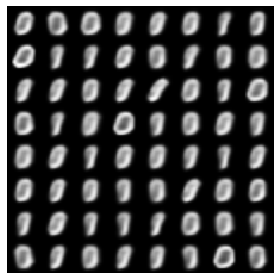

  5%|▌         | 26/500 [22:59<6:59:16, 53.07s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5220000247936696 and for +1: 0.4780000227037817
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5380000255536288 and for +1: 0.4620000219438225
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.48400002298876643 and for +1: 0.5160000245086849
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5060000240337104 and for +1: 0.49400002346374094
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5000000237487257 and for +1: 0.5000000237487257
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 27 	 Current ELBO: -412.48565673828125
Saved samples to ./pics/mnist_epoch_26_K_5_N_2_amortize_True.png


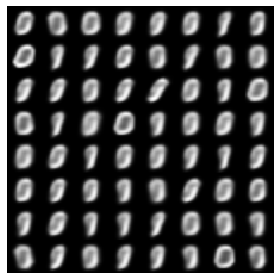

  5%|▌         | 27/500 [23:52<6:58:23, 53.07s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.4760000226087868 and for +1: 0.5240000248886645
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5240000248886645 and for +1: 0.4760000226087868
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.5020000238437206 and for +1: 0.49800002365373075
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5060000240337104 and for +1: 0.49400002346374094
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.49600002355873585 and for +1: 0.5040000239387155
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 28 	 Current ELBO: -403.4648132324219
Saved samples to ./pics/mnist_epoch_27_K_5_N_2_amortize_True.png


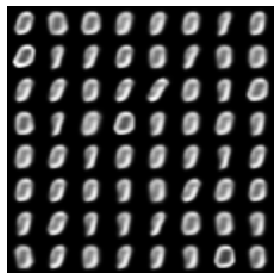

  6%|▌         | 28/500 [24:45<6:57:27, 53.07s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.4800000227987766 and for +1: 0.5200000246986747
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5080000241287053 and for +1: 0.49200002336874604
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.4780000227037817 and for +1: 0.5220000247936696
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5020000238437206 and for +1: 0.49800002365373075
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.49800002365373075 and for +1: 0.5020000238437206
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 29 	 Current ELBO: -406.26214599609375
Saved samples to ./pics/mnist_epoch_28_K_5_N_2_amortize_True.png


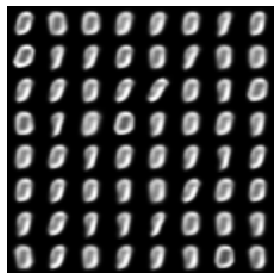

  6%|▌         | 29/500 [25:38<6:56:33, 53.06s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5380000255536288 and for +1: 0.4620000219438225
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5120000243186951 and for +1: 0.48800002317875624
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.49400002346374094 and for +1: 0.5060000240337104
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.49200002336874604 and for +1: 0.5080000241287053
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5220000247936696 and for +1: 0.4780000227037817
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 30 	 Current ELBO: -406.6164245605469
Saved samples to ./pics/mnist_epoch_29_K_5_N_2_amortize_True.png


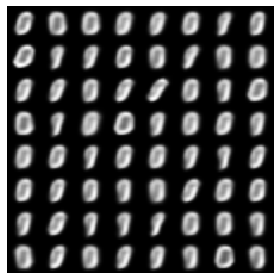

  6%|▌         | 30/500 [26:31<6:55:40, 53.07s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.48600002308376133 and for +1: 0.51400002441369
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.49400002346374094 and for +1: 0.5060000240337104
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.48800002317875624 and for +1: 0.5120000243186951
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.48200002289377153 and for +1: 0.5180000246036798
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.49800002365373075 and for +1: 0.5020000238437206
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 31 	 Current ELBO: -413.115478515625
Saved samples to ./pics/mnist_epoch_30_K_5_N_2_amortize_True.png


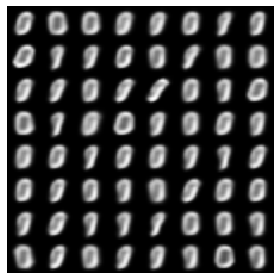

  6%|▌         | 31/500 [27:24<6:54:48, 53.07s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.49600002355873585 and for +1: 0.5040000239387155
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5380000255536288 and for +1: 0.4620000219438225
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.5200000246986747 and for +1: 0.4800000227987766
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.4780000227037817 and for +1: 0.5220000247936696
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.4700000223238021 and for +1: 0.5300000251736492
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 32 	 Current ELBO: -406.6201171875
Saved samples to ./pics/mnist_epoch_31_K_5_N_2_amortize_True.png


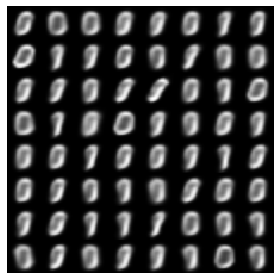

  6%|▋         | 32/500 [28:17<6:53:57, 53.07s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.4680000222288072 and for +1: 0.5320000252686441
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.48200002289377153 and for +1: 0.5180000246036798
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.4780000227037817 and for +1: 0.5220000247936696
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.48200002289377153 and for +1: 0.5180000246036798
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5020000238437206 and for +1: 0.49800002365373075
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 33 	 Current ELBO: -403.4491882324219
Saved samples to ./pics/mnist_epoch_32_K_5_N_2_amortize_True.png


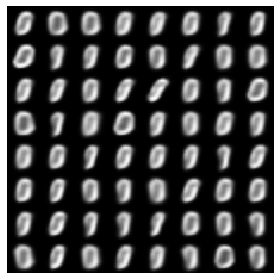

  7%|▋         | 33/500 [29:10<6:53:04, 53.07s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5120000243186951 and for +1: 0.48800002317875624
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5020000238437206 and for +1: 0.49800002365373075
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.48400002298876643 and for +1: 0.5160000245086849
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5180000246036798 and for +1: 0.48200002289377153
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5280000250786543 and for +1: 0.472000022418797
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 34 	 Current ELBO: -405.7413330078125
Saved samples to ./pics/mnist_epoch_33_K_5_N_2_amortize_True.png


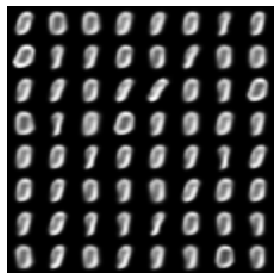

  7%|▋         | 34/500 [30:03<6:52:15, 53.08s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.49400002346374094 and for +1: 0.5060000240337104
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.48800002317875624 and for +1: 0.5120000243186951
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.4780000227037817 and for +1: 0.5220000247936696
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.48200002289377153 and for +1: 0.5180000246036798
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5120000243186951 and for +1: 0.48800002317875624
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 35 	 Current ELBO: -409.83306884765625
Saved samples to ./pics/mnist_epoch_34_K_5_N_2_amortize_True.png


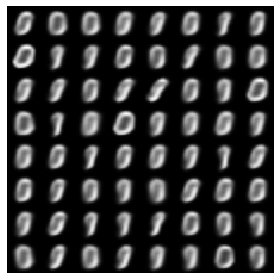

  7%|▋         | 35/500 [30:57<6:51:22, 53.08s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.49200002336874604 and for +1: 0.5080000241287053
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.49000002327375114 and for +1: 0.5100000242237002
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.5280000250786543 and for +1: 0.472000022418797
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.4780000227037817 and for +1: 0.5220000247936696
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5060000240337104 and for +1: 0.49400002346374094
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 36 	 Current ELBO: -414.0038757324219
Saved samples to ./pics/mnist_epoch_35_K_5_N_2_amortize_True.png


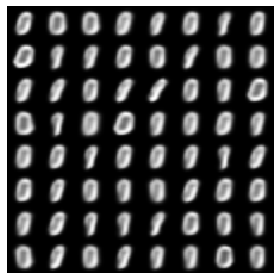

  7%|▋         | 36/500 [31:50<6:50:31, 53.09s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5100000242237002 and for +1: 0.49000002327375114
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5280000250786543 and for +1: 0.472000022418797
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.49000002327375114 and for +1: 0.5100000242237002
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5120000243186951 and for +1: 0.48800002317875624
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.48600002308376133 and for +1: 0.51400002441369
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 37 	 Current ELBO: -409.7447814941406
Saved samples to ./pics/mnist_epoch_36_K_5_N_2_amortize_True.png


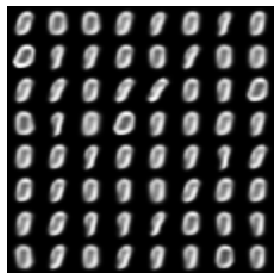

  7%|▋         | 37/500 [32:43<6:49:37, 53.08s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5000000237487257 and for +1: 0.5000000237487257
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.48200002289377153 and for +1: 0.5180000246036798
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.49600002355873585 and for +1: 0.5040000239387155
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5080000241287053 and for +1: 0.49200002336874604
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5460000259336084 and for +1: 0.4540000215638429
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 38 	 Current ELBO: -400.8369445800781
Saved samples to ./pics/mnist_epoch_37_K_5_N_2_amortize_True.png


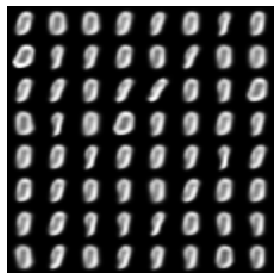

  8%|▊         | 38/500 [33:36<6:48:42, 53.08s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5360000254586339 and for +1: 0.4640000220388174
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5500000261235982 and for +1: 0.4500000213738531
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.5060000240337104 and for +1: 0.49400002346374094
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5280000250786543 and for +1: 0.472000022418797
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5080000241287053 and for +1: 0.49200002336874604
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 39 	 Current ELBO: -405.6181640625
Saved samples to ./pics/mnist_epoch_38_K_5_N_2_amortize_True.png


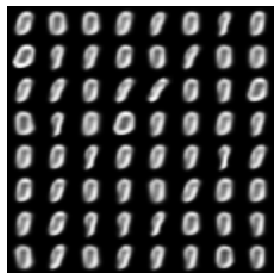

  8%|▊         | 39/500 [34:29<6:47:59, 53.10s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5020000238437206 and for +1: 0.49800002365373075
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.48800002317875624 and for +1: 0.5120000243186951
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.48600002308376133 and for +1: 0.51400002441369
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.4780000227037817 and for +1: 0.5220000247936696
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5400000256486237 and for +1: 0.4600000218488276
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 40 	 Current ELBO: -406.2579650878906
Saved samples to ./pics/mnist_epoch_39_K_5_N_2_amortize_True.png


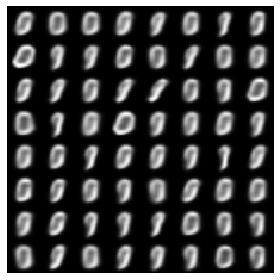

  8%|▊         | 40/500 [35:22<6:47:06, 53.10s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.452000021468848 and for +1: 0.5480000260286033
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5620000266935676 and for +1: 0.43800002080388367
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.5180000246036798 and for +1: 0.48200002289377153
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5000000237487257 and for +1: 0.5000000237487257
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.48600002308376133 and for +1: 0.51400002441369
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 41 	 Current ELBO: -412.1333312988281
Saved samples to ./pics/mnist_epoch_40_K_5_N_2_amortize_True.png


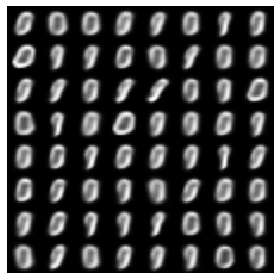

  8%|▊         | 41/500 [36:15<6:46:09, 53.09s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5180000246036798 and for +1: 0.48200002289377153
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5000000237487257 and for +1: 0.5000000237487257
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.5300000251736492 and for +1: 0.4700000223238021
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5300000251736492 and for +1: 0.4700000223238021
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5120000243186951 and for +1: 0.48800002317875624
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 42 	 Current ELBO: -415.08935546875
Saved samples to ./pics/mnist_epoch_41_K_5_N_2_amortize_True.png


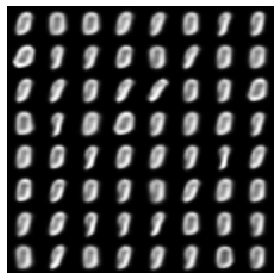

  8%|▊         | 42/500 [37:08<6:45:16, 53.09s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.49600002355873585 and for +1: 0.5040000239387155
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.4740000225137919 and for +1: 0.5260000249836594
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.5180000246036798 and for +1: 0.48200002289377153
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.4740000225137919 and for +1: 0.5260000249836594
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.452000021468848 and for +1: 0.5480000260286033
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 43 	 Current ELBO: -404.8032531738281
Saved samples to ./pics/mnist_epoch_42_K_5_N_2_amortize_True.png


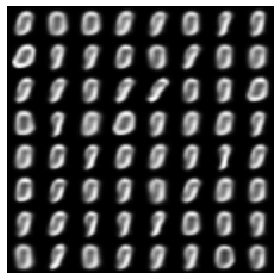

  9%|▊         | 43/500 [38:01<6:44:24, 53.09s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.4620000219438225 and for +1: 0.5380000255536288
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.4540000215638429 and for +1: 0.5460000259336084
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.5380000255536288 and for +1: 0.4620000219438225
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5080000241287053 and for +1: 0.49200002336874604
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.49800002365373075 and for +1: 0.5020000238437206
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 44 	 Current ELBO: -394.16064453125
Saved samples to ./pics/mnist_epoch_43_K_5_N_2_amortize_True.png


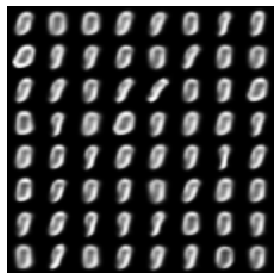

  9%|▉         | 44/500 [38:54<6:43:31, 53.09s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5180000246036798 and for +1: 0.48200002289377153
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.4780000227037817 and for +1: 0.5220000247936696
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.5100000242237002 and for +1: 0.49000002327375114
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5280000250786543 and for +1: 0.472000022418797
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5240000248886645 and for +1: 0.4760000226087868
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 45 	 Current ELBO: -402.3263854980469
Saved samples to ./pics/mnist_epoch_44_K_5_N_2_amortize_True.png


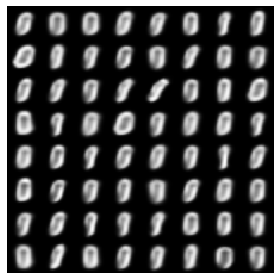

  9%|▉         | 45/500 [39:48<6:42:39, 53.10s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.49000002327375114 and for +1: 0.5100000242237002
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.4500000213738531 and for +1: 0.5500000261235982
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.5300000251736492 and for +1: 0.4700000223238021
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.48600002308376133 and for +1: 0.51400002441369
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.51400002441369 and for +1: 0.48600002308376133
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 46 	 Current ELBO: -405.2149963378906
Saved samples to ./pics/mnist_epoch_45_K_5_N_2_amortize_True.png


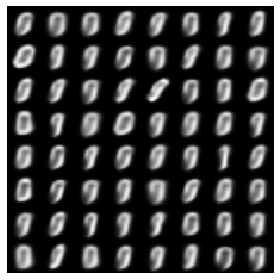

  9%|▉         | 46/500 [40:41<6:41:44, 53.09s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5060000240337104 and for +1: 0.49400002346374094
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5180000246036798 and for +1: 0.48200002289377153
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.5280000250786543 and for +1: 0.472000022418797
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.472000022418797 and for +1: 0.5280000250786543
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5200000246986747 and for +1: 0.4800000227987766
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 47 	 Current ELBO: -400.4571838378906
Saved samples to ./pics/mnist_epoch_46_K_5_N_2_amortize_True.png


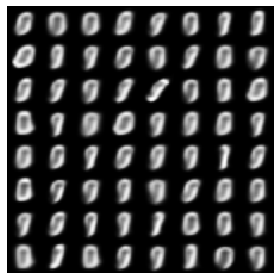

  9%|▉         | 47/500 [41:34<6:40:52, 53.10s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.4800000227987766 and for +1: 0.5200000246986747
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5460000259336084 and for +1: 0.4540000215638429
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.5040000239387155 and for +1: 0.49600002355873585
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.49200002336874604 and for +1: 0.5080000241287053
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5020000238437206 and for +1: 0.49800002365373075
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 48 	 Current ELBO: -403.6230773925781
Saved samples to ./pics/mnist_epoch_47_K_5_N_2_amortize_True.png


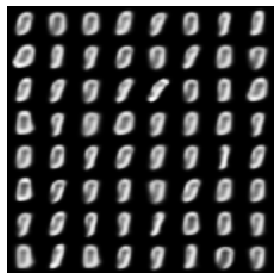

 10%|▉         | 48/500 [42:27<6:39:57, 53.09s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5240000248886645 and for +1: 0.4760000226087868
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.48800002317875624 and for +1: 0.5120000243186951
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.5040000239387155 and for +1: 0.49600002355873585
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.49600002355873585 and for +1: 0.5040000239387155
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5300000251736492 and for +1: 0.4700000223238021
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 49 	 Current ELBO: -404.64154052734375
Saved samples to ./pics/mnist_epoch_48_K_5_N_2_amortize_True.png


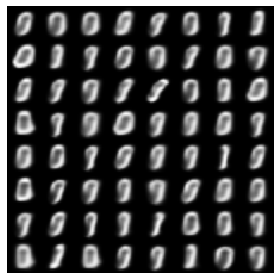

 10%|▉         | 49/500 [43:20<6:39:06, 53.10s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5120000243186951 and for +1: 0.48800002317875624
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.51400002441369 and for +1: 0.48600002308376133
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.4800000227987766 and for +1: 0.5200000246986747
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.4780000227037817 and for +1: 0.5220000247936696
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.49000002327375114 and for +1: 0.5100000242237002
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 50 	 Current ELBO: -406.47222900390625
Saved samples to ./pics/mnist_epoch_49_K_5_N_2_amortize_True.png


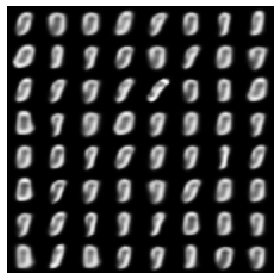

 10%|█         | 50/500 [44:13<6:38:10, 53.09s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5040000239387155 and for +1: 0.49600002355873585
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5040000239387155 and for +1: 0.49600002355873585
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.5080000241287053 and for +1: 0.49200002336874604
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5120000243186951 and for +1: 0.48800002317875624
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.4740000225137919 and for +1: 0.5260000249836594
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 51 	 Current ELBO: -399.16241455078125
Saved samples to ./pics/mnist_epoch_50_K_5_N_2_amortize_True.png


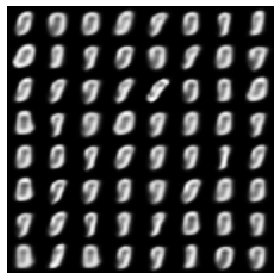

 10%|█         | 51/500 [45:06<6:37:17, 53.09s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.48600002308376133 and for +1: 0.51400002441369
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.472000022418797 and for +1: 0.5280000250786543
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.48200002289377153 and for +1: 0.5180000246036798
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5360000254586339 and for +1: 0.4640000220388174
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.49600002355873585 and for +1: 0.5040000239387155
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 52 	 Current ELBO: -416.03363037109375
Saved samples to ./pics/mnist_epoch_51_K_5_N_2_amortize_True.png


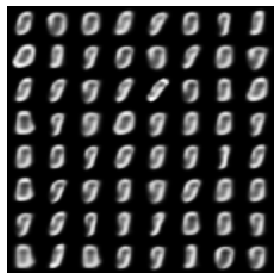

 10%|█         | 52/500 [45:59<6:36:24, 53.09s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.4700000223238021 and for +1: 0.5300000251736492
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5020000238437206 and for +1: 0.49800002365373075
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.5020000238437206 and for +1: 0.49800002365373075
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.4800000227987766 and for +1: 0.5200000246986747
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5200000246986747 and for +1: 0.4800000227987766
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 53 	 Current ELBO: -398.8328552246094
Saved samples to ./pics/mnist_epoch_52_K_5_N_2_amortize_True.png


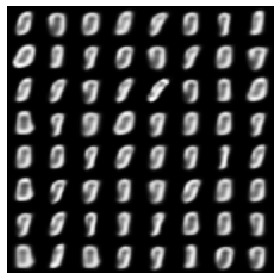

 11%|█         | 53/500 [46:52<6:35:35, 53.10s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.4680000222288072 and for +1: 0.5320000252686441
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5280000250786543 and for +1: 0.472000022418797
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.5100000242237002 and for +1: 0.49000002327375114
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5620000266935676 and for +1: 0.43800002080388367
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5220000247936696 and for +1: 0.4780000227037817
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 54 	 Current ELBO: -394.2035827636719
Saved samples to ./pics/mnist_epoch_53_K_5_N_2_amortize_True.png


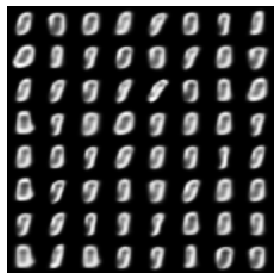

 11%|█         | 54/500 [47:45<6:34:40, 53.09s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5080000241287053 and for +1: 0.49200002336874604
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5060000240337104 and for +1: 0.49400002346374094
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.49200002336874604 and for +1: 0.5080000241287053
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.48800002317875624 and for +1: 0.5120000243186951
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5100000242237002 and for +1: 0.49000002327375114
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 55 	 Current ELBO: -400.2229919433594
Saved samples to ./pics/mnist_epoch_54_K_5_N_2_amortize_True.png


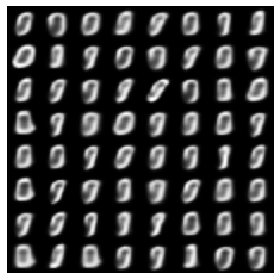

 11%|█         | 55/500 [48:38<6:33:50, 53.10s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.42800002032890916 and for +1: 0.5720000271685421
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.48800002317875624 and for +1: 0.5120000243186951
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.49800002365373075 and for +1: 0.5020000238437206
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.4620000219438225 and for +1: 0.5380000255536288
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.48400002298876643 and for +1: 0.5160000245086849
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 56 	 Current ELBO: -406.1192626953125
Saved samples to ./pics/mnist_epoch_55_K_5_N_2_amortize_True.png


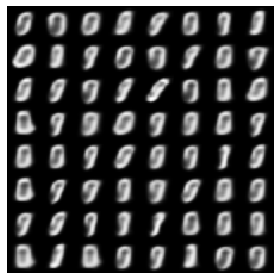

 11%|█         | 56/500 [49:32<6:32:56, 53.10s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.48800002317875624 and for +1: 0.5120000243186951
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5000000237487257 and for +1: 0.5000000237487257
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.5120000243186951 and for +1: 0.48800002317875624
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.48800002317875624 and for +1: 0.5120000243186951
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.49600002355873585 and for +1: 0.5040000239387155
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 57 	 Current ELBO: -395.9999694824219
Saved samples to ./pics/mnist_epoch_56_K_5_N_2_amortize_True.png


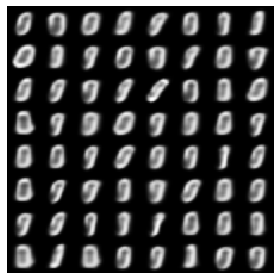

 11%|█▏        | 57/500 [50:25<6:32:04, 53.10s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.4620000219438225 and for +1: 0.5380000255536288
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.4760000226087868 and for +1: 0.5240000248886645
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.48600002308376133 and for +1: 0.51400002441369
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5020000238437206 and for +1: 0.49800002365373075
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.4700000223238021 and for +1: 0.5300000251736492
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 58 	 Current ELBO: -391.47265625
Saved samples to ./pics/mnist_epoch_57_K_5_N_2_amortize_True.png


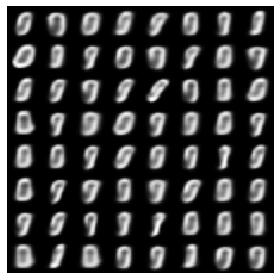

 12%|█▏        | 58/500 [51:18<6:31:10, 53.10s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.48400002298876643 and for +1: 0.5160000245086849
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5240000248886645 and for +1: 0.4760000226087868
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.48600002308376133 and for +1: 0.51400002441369
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.49000002327375114 and for +1: 0.5100000242237002
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.49800002365373075 and for +1: 0.5020000238437206
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 59 	 Current ELBO: -401.76690673828125
Saved samples to ./pics/mnist_epoch_58_K_5_N_2_amortize_True.png


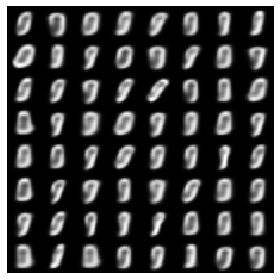

 12%|█▏        | 59/500 [52:11<6:30:16, 53.10s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.49400002346374094 and for +1: 0.5060000240337104
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5440000258386135 and for +1: 0.4560000216588378
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.5480000260286033 and for +1: 0.452000021468848
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5080000241287053 and for +1: 0.49200002336874604
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5000000237487257 and for +1: 0.5000000237487257
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 60 	 Current ELBO: -395.99560546875
Saved samples to ./pics/mnist_epoch_59_K_5_N_2_amortize_True.png


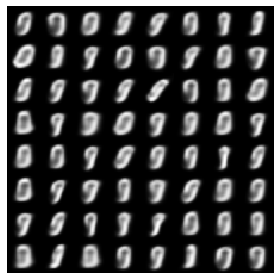

 12%|█▏        | 60/500 [53:04<6:29:20, 53.09s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5260000249836594 and for +1: 0.4740000225137919
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5240000248886645 and for +1: 0.4760000226087868
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.5000000237487257 and for +1: 0.5000000237487257
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5020000238437206 and for +1: 0.49800002365373075
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.4640000220388174 and for +1: 0.5360000254586339
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 61 	 Current ELBO: -403.7290344238281
Saved samples to ./pics/mnist_epoch_60_K_5_N_2_amortize_True.png


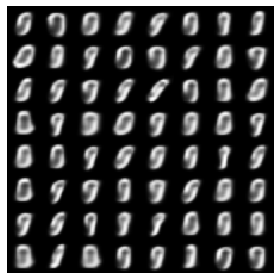

 12%|█▏        | 61/500 [53:57<6:28:26, 53.09s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5240000248886645 and for +1: 0.4760000226087868
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5580000265035778 and for +1: 0.4420000209938735
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.48200002289377153 and for +1: 0.5180000246036798
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.4620000219438225 and for +1: 0.5380000255536288
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.48400002298876643 and for +1: 0.5160000245086849
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 62 	 Current ELBO: -404.1866149902344
Saved samples to ./pics/mnist_epoch_61_K_5_N_2_amortize_True.png


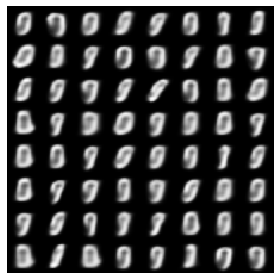

 12%|█▏        | 62/500 [54:50<6:27:32, 53.09s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.48600002308376133 and for +1: 0.51400002441369
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.49000002327375114 and for +1: 0.5100000242237002
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.5220000247936696 and for +1: 0.4780000227037817
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5300000251736492 and for +1: 0.4700000223238021
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.49400002346374094 and for +1: 0.5060000240337104
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 63 	 Current ELBO: -384.7100830078125
Saved samples to ./pics/mnist_epoch_62_K_5_N_2_amortize_True.png


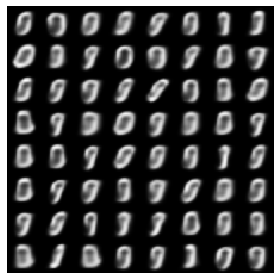

 13%|█▎        | 63/500 [55:43<6:26:36, 53.08s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.49800002365373075 and for +1: 0.5020000238437206
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.49800002365373075 and for +1: 0.5020000238437206
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.5060000240337104 and for +1: 0.49400002346374094
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.4540000215638429 and for +1: 0.5460000259336084
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5020000238437206 and for +1: 0.49800002365373075
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 64 	 Current ELBO: -391.0133361816406
Saved samples to ./pics/mnist_epoch_63_K_5_N_2_amortize_True.png


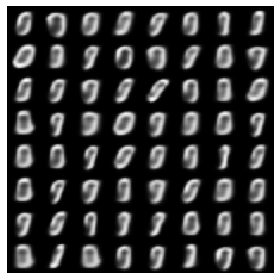

 13%|█▎        | 64/500 [56:36<6:25:42, 53.08s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.48200002289377153 and for +1: 0.5180000246036798
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5060000240337104 and for +1: 0.49400002346374094
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.472000022418797 and for +1: 0.5280000250786543
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5420000257436186 and for +1: 0.4580000217538327
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5160000245086849 and for +1: 0.48400002298876643
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 65 	 Current ELBO: -387.26287841796875
Saved samples to ./pics/mnist_epoch_64_K_5_N_2_amortize_True.png


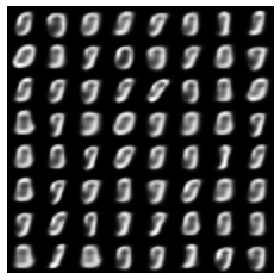

 13%|█▎        | 65/500 [57:29<6:24:48, 53.08s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5100000242237002 and for +1: 0.49000002327375114
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.51400002441369 and for +1: 0.48600002308376133
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.4640000220388174 and for +1: 0.5360000254586339
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.48200002289377153 and for +1: 0.5180000246036798
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.49800002365373075 and for +1: 0.5020000238437206
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 66 	 Current ELBO: -389.55438232421875
Saved samples to ./pics/mnist_epoch_65_K_5_N_2_amortize_True.png


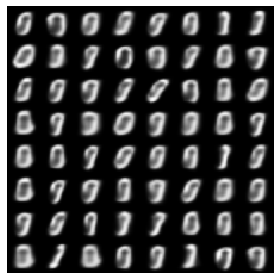

 13%|█▎        | 66/500 [58:22<6:23:54, 53.08s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5160000245086849 and for +1: 0.48400002298876643
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.4780000227037817 and for +1: 0.5220000247936696
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.5020000238437206 and for +1: 0.49800002365373075
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.48600002308376133 and for +1: 0.51400002441369
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5000000237487257 and for +1: 0.5000000237487257
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 67 	 Current ELBO: -388.5562744140625
Saved samples to ./pics/mnist_epoch_66_K_5_N_2_amortize_True.png


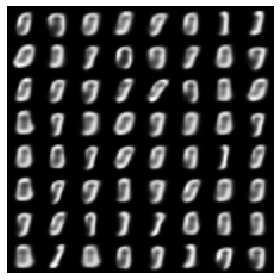

 13%|█▎        | 67/500 [59:16<6:23:05, 53.08s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5160000245086849 and for +1: 0.48400002298876643
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5100000242237002 and for +1: 0.49000002327375114
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.48400002298876643 and for +1: 0.5160000245086849
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.4780000227037817 and for +1: 0.5220000247936696
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.49200002336874604 and for +1: 0.5080000241287053
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 68 	 Current ELBO: -396.10223388671875
Saved samples to ./pics/mnist_epoch_67_K_5_N_2_amortize_True.png


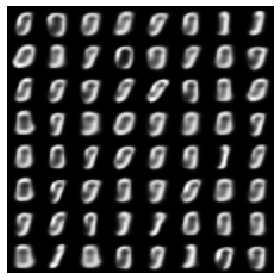

 14%|█▎        | 68/500 [1:00:09<6:22:10, 53.08s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5180000246036798 and for +1: 0.48200002289377153
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5120000243186951 and for +1: 0.48800002317875624
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.5180000246036798 and for +1: 0.48200002289377153
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5040000239387155 and for +1: 0.49600002355873585
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.4580000217538327 and for +1: 0.5420000257436186
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 69 	 Current ELBO: -393.0132751464844
Saved samples to ./pics/mnist_epoch_68_K_5_N_2_amortize_True.png


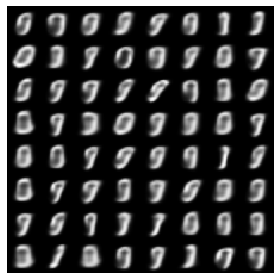

 14%|█▍        | 69/500 [1:01:02<6:21:15, 53.08s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5040000239387155 and for +1: 0.49600002355873585
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.49600002355873585 and for +1: 0.5040000239387155
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.49400002346374094 and for +1: 0.5060000240337104
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5040000239387155 and for +1: 0.49600002355873585
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5040000239387155 and for +1: 0.49600002355873585
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 70 	 Current ELBO: -389.0752258300781
Saved samples to ./pics/mnist_epoch_69_K_5_N_2_amortize_True.png


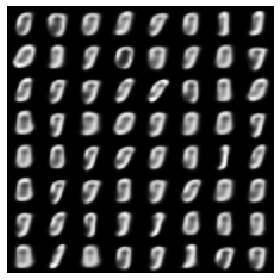

 14%|█▍        | 70/500 [1:01:55<6:20:22, 53.08s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.472000022418797 and for +1: 0.5280000250786543
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5100000242237002 and for +1: 0.49000002327375114
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.5060000240337104 and for +1: 0.49400002346374094
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.4740000225137919 and for +1: 0.5260000249836594
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.48800002317875624 and for +1: 0.5120000243186951
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 71 	 Current ELBO: -396.2011413574219
Saved samples to ./pics/mnist_epoch_70_K_5_N_2_amortize_True.png


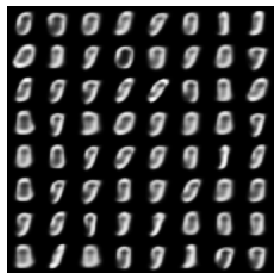

 14%|█▍        | 71/500 [1:02:48<6:19:28, 53.07s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5120000243186951 and for +1: 0.48800002317875624
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5040000239387155 and for +1: 0.49600002355873585
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.48200002289377153 and for +1: 0.5180000246036798
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.51400002441369 and for +1: 0.48600002308376133
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.49400002346374094 and for +1: 0.5060000240337104
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 72 	 Current ELBO: -383.34246826171875
Saved samples to ./pics/mnist_epoch_71_K_5_N_2_amortize_True.png


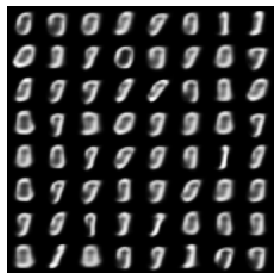

 14%|█▍        | 72/500 [1:03:41<6:18:36, 53.08s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5000000237487257 and for +1: 0.5000000237487257
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.51400002441369 and for +1: 0.48600002308376133
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.48200002289377153 and for +1: 0.5180000246036798
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5200000246986747 and for +1: 0.4800000227987766
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5160000245086849 and for +1: 0.48400002298876643
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 73 	 Current ELBO: -393.7293395996094
Saved samples to ./pics/mnist_epoch_72_K_5_N_2_amortize_True.png


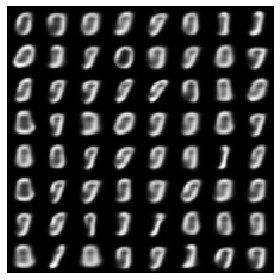

 15%|█▍        | 73/500 [1:04:34<6:17:46, 53.08s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.4760000226087868 and for +1: 0.5240000248886645
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5100000242237002 and for +1: 0.49000002327375114
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.5040000239387155 and for +1: 0.49600002355873585
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5040000239387155 and for +1: 0.49600002355873585
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5020000238437206 and for +1: 0.49800002365373075
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 74 	 Current ELBO: -390.44500732421875
Saved samples to ./pics/mnist_epoch_73_K_5_N_2_amortize_True.png


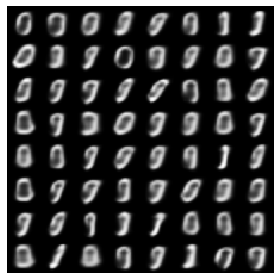

 15%|█▍        | 74/500 [1:05:27<6:16:52, 53.08s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5180000246036798 and for +1: 0.48200002289377153
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.49800002365373075 and for +1: 0.5020000238437206
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.5200000246986747 and for +1: 0.4800000227987766
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.49400002346374094 and for +1: 0.5060000240337104
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5420000257436186 and for +1: 0.4580000217538327
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 75 	 Current ELBO: -381.5425109863281
Saved samples to ./pics/mnist_epoch_74_K_5_N_2_amortize_True.png


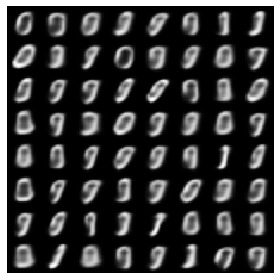

 15%|█▌        | 75/500 [1:06:20<6:16:01, 53.09s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.534000025363639 and for +1: 0.4660000221338123
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.48400002298876643 and for +1: 0.5160000245086849
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.4800000227987766 and for +1: 0.5200000246986747
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.48400002298876643 and for +1: 0.5160000245086849
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.49400002346374094 and for +1: 0.5060000240337104
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 76 	 Current ELBO: -388.51263427734375
Saved samples to ./pics/mnist_epoch_75_K_5_N_2_amortize_True.png


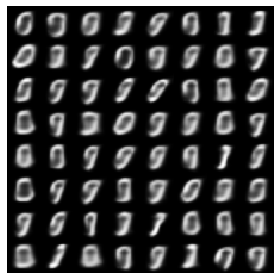

 15%|█▌        | 76/500 [1:07:13<6:15:07, 53.08s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5080000241287053 and for +1: 0.49200002336874604
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5180000246036798 and for +1: 0.48200002289377153
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.51400002441369 and for +1: 0.48600002308376133
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5280000250786543 and for +1: 0.472000022418797
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5020000238437206 and for +1: 0.49800002365373075
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 77 	 Current ELBO: -380.2423400878906
Saved samples to ./pics/mnist_epoch_76_K_5_N_2_amortize_True.png


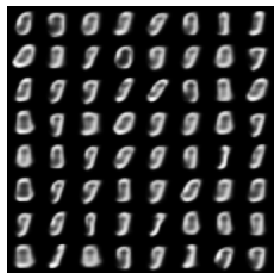

 15%|█▌        | 77/500 [1:08:06<6:14:15, 53.09s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.49000002327375114 and for +1: 0.5100000242237002
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.4800000227987766 and for +1: 0.5200000246986747
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.5200000246986747 and for +1: 0.4800000227987766
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.49600002355873585 and for +1: 0.5040000239387155
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5020000238437206 and for +1: 0.49800002365373075
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 78 	 Current ELBO: -391.74432373046875
Saved samples to ./pics/mnist_epoch_77_K_5_N_2_amortize_True.png


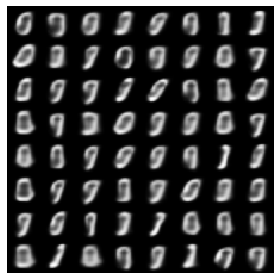

 16%|█▌        | 78/500 [1:08:59<6:13:22, 53.09s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.49000002327375114 and for +1: 0.5100000242237002
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.4800000227987766 and for +1: 0.5200000246986747
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.4740000225137919 and for +1: 0.5260000249836594
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.49400002346374094 and for +1: 0.5060000240337104
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5020000238437206 and for +1: 0.49800002365373075
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 79 	 Current ELBO: -387.0994873046875
Saved samples to ./pics/mnist_epoch_78_K_5_N_2_amortize_True.png


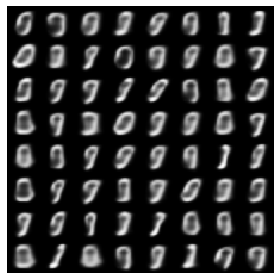

 16%|█▌        | 79/500 [1:09:53<6:12:31, 53.09s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.472000022418797 and for +1: 0.5280000250786543
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5100000242237002 and for +1: 0.49000002327375114
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.48200002289377153 and for +1: 0.5180000246036798
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.4800000227987766 and for +1: 0.5200000246986747
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5160000245086849 and for +1: 0.48400002298876643
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 80 	 Current ELBO: -384.7897644042969
Saved samples to ./pics/mnist_epoch_79_K_5_N_2_amortize_True.png


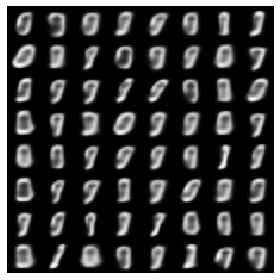

 16%|█▌        | 80/500 [1:10:46<6:11:40, 53.10s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.4800000227987766 and for +1: 0.5200000246986747
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5000000237487257 and for +1: 0.5000000237487257
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.49400002346374094 and for +1: 0.5060000240337104
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5160000245086849 and for +1: 0.48400002298876643
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.51400002441369 and for +1: 0.48600002308376133
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 81 	 Current ELBO: -386.7525939941406
Saved samples to ./pics/mnist_epoch_80_K_5_N_2_amortize_True.png


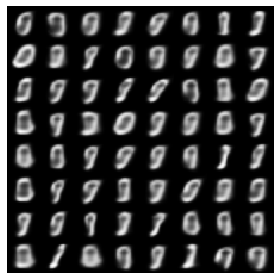

 16%|█▌        | 81/500 [1:11:39<6:10:51, 53.11s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.49400002346374094 and for +1: 0.5060000240337104
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.534000025363639 and for +1: 0.4660000221338123
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.51400002441369 and for +1: 0.48600002308376133
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5420000257436186 and for +1: 0.4580000217538327
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.48400002298876643 and for +1: 0.5160000245086849
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 82 	 Current ELBO: -386.6327209472656
Saved samples to ./pics/mnist_epoch_81_K_5_N_2_amortize_True.png


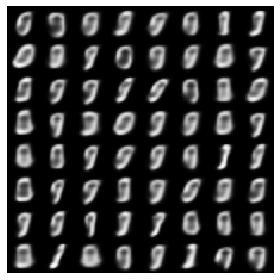

 16%|█▋        | 82/500 [1:12:32<6:09:57, 53.10s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.49600002355873585 and for +1: 0.5040000239387155
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.49000002327375114 and for +1: 0.5100000242237002
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.5260000249836594 and for +1: 0.4740000225137919
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5280000250786543 and for +1: 0.472000022418797
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.49200002336874604 and for +1: 0.5080000241287053
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 83 	 Current ELBO: -383.8230895996094
Saved samples to ./pics/mnist_epoch_82_K_5_N_2_amortize_True.png


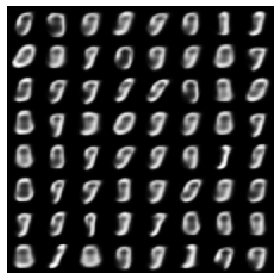

 17%|█▋        | 83/500 [1:13:25<6:09:02, 53.10s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5000000237487257 and for +1: 0.5000000237487257
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.4800000227987766 and for +1: 0.5200000246986747
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.4640000220388174 and for +1: 0.5360000254586339
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5100000242237002 and for +1: 0.49000002327375114
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5260000249836594 and for +1: 0.4740000225137919
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 84 	 Current ELBO: -387.6005859375
Saved samples to ./pics/mnist_epoch_83_K_5_N_2_amortize_True.png


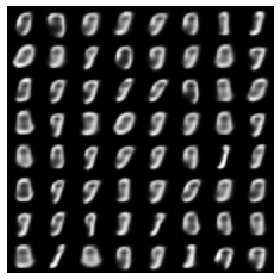

 17%|█▋        | 84/500 [1:14:18<6:08:06, 53.09s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.452000021468848 and for +1: 0.5480000260286033
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5000000237487257 and for +1: 0.5000000237487257
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.5120000243186951 and for +1: 0.48800002317875624
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5000000237487257 and for +1: 0.5000000237487257
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.48800002317875624 and for +1: 0.5120000243186951
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 85 	 Current ELBO: -388.8444519042969
Saved samples to ./pics/mnist_epoch_84_K_5_N_2_amortize_True.png


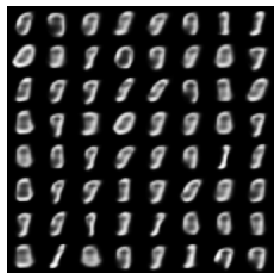

 17%|█▋        | 85/500 [1:15:11<6:07:15, 53.10s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.4800000227987766 and for +1: 0.5200000246986747
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5020000238437206 and for +1: 0.49800002365373075
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.534000025363639 and for +1: 0.4660000221338123
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.49200002336874604 and for +1: 0.5080000241287053
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5100000242237002 and for +1: 0.49000002327375114
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 86 	 Current ELBO: -381.1809997558594
Saved samples to ./pics/mnist_epoch_85_K_5_N_2_amortize_True.png


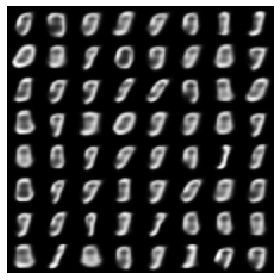

 17%|█▋        | 86/500 [1:16:04<6:06:20, 53.09s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5240000248886645 and for +1: 0.4760000226087868
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5440000258386135 and for +1: 0.4560000216588378
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.5080000241287053 and for +1: 0.49200002336874604
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.4540000215638429 and for +1: 0.5460000259336084
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.452000021468848 and for +1: 0.5480000260286033
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 87 	 Current ELBO: -397.5779724121094
Saved samples to ./pics/mnist_epoch_86_K_5_N_2_amortize_True.png


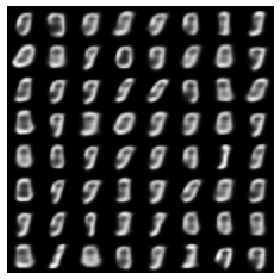

 17%|█▋        | 87/500 [1:16:57<6:05:23, 53.08s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5200000246986747 and for +1: 0.4800000227987766
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5320000252686441 and for +1: 0.4680000222288072
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.4640000220388174 and for +1: 0.5360000254586339
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5220000247936696 and for +1: 0.4780000227037817
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5060000240337104 and for +1: 0.49400002346374094
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 88 	 Current ELBO: -389.31915283203125
Saved samples to ./pics/mnist_epoch_87_K_5_N_2_amortize_True.png


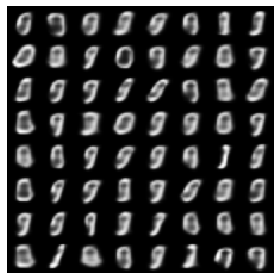

 18%|█▊        | 88/500 [1:17:50<6:04:28, 53.08s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5040000239387155 and for +1: 0.49600002355873585
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5300000251736492 and for +1: 0.4700000223238021
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.4640000220388174 and for +1: 0.5360000254586339
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5260000249836594 and for +1: 0.4740000225137919
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5080000241287053 and for +1: 0.49200002336874604
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 89 	 Current ELBO: -387.5340270996094
Saved samples to ./pics/mnist_epoch_88_K_5_N_2_amortize_True.png


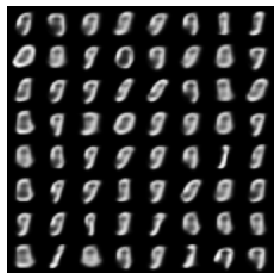

 18%|█▊        | 89/500 [1:18:43<6:03:33, 53.08s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.51400002441369 and for +1: 0.48600002308376133
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5160000245086849 and for +1: 0.48400002298876643
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.5080000241287053 and for +1: 0.49200002336874604
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5080000241287053 and for +1: 0.49200002336874604
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.48800002317875624 and for +1: 0.5120000243186951
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 90 	 Current ELBO: -387.7501525878906
Saved samples to ./pics/mnist_epoch_89_K_5_N_2_amortize_True.png


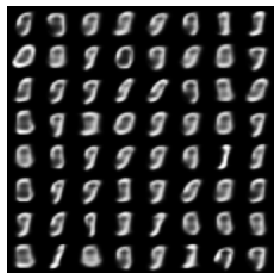

 18%|█▊        | 90/500 [1:19:36<6:02:39, 53.07s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5240000248886645 and for +1: 0.4760000226087868
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.49200002336874604 and for +1: 0.5080000241287053
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.5320000252686441 and for +1: 0.4680000222288072
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5020000238437206 and for +1: 0.49800002365373075
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5320000252686441 and for +1: 0.4680000222288072
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 91 	 Current ELBO: -377.67578125
Saved samples to ./pics/mnist_epoch_90_K_5_N_2_amortize_True.png


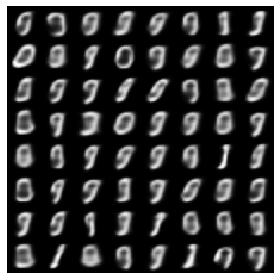

 18%|█▊        | 91/500 [1:20:30<6:01:47, 53.08s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5440000258386135 and for +1: 0.4560000216588378
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.4700000223238021 and for +1: 0.5300000251736492
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.5020000238437206 and for +1: 0.49800002365373075
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.48400002298876643 and for +1: 0.5160000245086849
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5280000250786543 and for +1: 0.472000022418797
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 92 	 Current ELBO: -385.91278076171875
Saved samples to ./pics/mnist_epoch_91_K_5_N_2_amortize_True.png


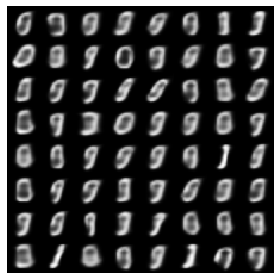

 18%|█▊        | 92/500 [1:21:23<6:00:55, 53.08s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5300000251736492 and for +1: 0.4700000223238021
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5020000238437206 and for +1: 0.49800002365373075
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.48600002308376133 and for +1: 0.51400002441369
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5360000254586339 and for +1: 0.4640000220388174
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5220000247936696 and for +1: 0.4780000227037817
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 93 	 Current ELBO: -384.10614013671875
Saved samples to ./pics/mnist_epoch_92_K_5_N_2_amortize_True.png


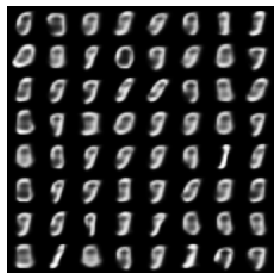

 19%|█▊        | 93/500 [1:22:16<6:00:02, 53.08s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.51400002441369 and for +1: 0.48600002308376133
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5020000238437206 and for +1: 0.49800002365373075
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.49200002336874604 and for +1: 0.5080000241287053
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.49000002327375114 and for +1: 0.5100000242237002
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.49800002365373075 and for +1: 0.5020000238437206
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 94 	 Current ELBO: -383.1610107421875
Saved samples to ./pics/mnist_epoch_93_K_5_N_2_amortize_True.png


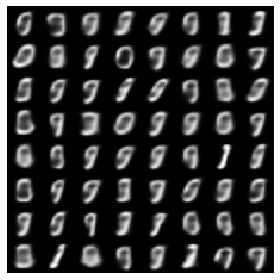

 19%|█▉        | 94/500 [1:23:09<5:59:08, 53.08s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5280000250786543 and for +1: 0.472000022418797
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.49600002355873585 and for +1: 0.5040000239387155
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.5120000243186951 and for +1: 0.48800002317875624
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.48600002308376133 and for +1: 0.51400002441369
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.48400002298876643 and for +1: 0.5160000245086849
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 95 	 Current ELBO: -387.975341796875
Saved samples to ./pics/mnist_epoch_94_K_5_N_2_amortize_True.png


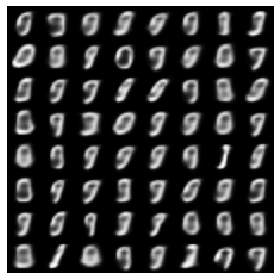

 19%|█▉        | 95/500 [1:24:02<5:58:20, 53.09s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.48800002317875624 and for +1: 0.5120000243186951
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5040000239387155 and for +1: 0.49600002355873585
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.5000000237487257 and for +1: 0.5000000237487257
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5380000255536288 and for +1: 0.4620000219438225
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.51400002441369 and for +1: 0.48600002308376133
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 96 	 Current ELBO: -389.2532653808594
Saved samples to ./pics/mnist_epoch_95_K_5_N_2_amortize_True.png


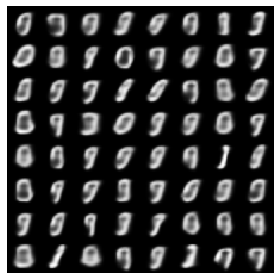

 19%|█▉        | 96/500 [1:24:55<5:57:26, 53.09s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.51400002441369 and for +1: 0.48600002308376133
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.49000002327375114 and for +1: 0.5100000242237002
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.49000002327375114 and for +1: 0.5100000242237002
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5020000238437206 and for +1: 0.49800002365373075
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.4700000223238021 and for +1: 0.5300000251736492
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 97 	 Current ELBO: -385.02020263671875
Saved samples to ./pics/mnist_epoch_96_K_5_N_2_amortize_True.png


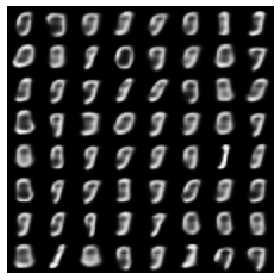

 19%|█▉        | 97/500 [1:25:48<5:56:33, 53.09s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5040000239387155 and for +1: 0.49600002355873585
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.48600002308376133 and for +1: 0.51400002441369
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.49200002336874604 and for +1: 0.5080000241287053
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.49800002365373075 and for +1: 0.5020000238437206
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.49000002327375114 and for +1: 0.5100000242237002
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 98 	 Current ELBO: -386.91680908203125
Saved samples to ./pics/mnist_epoch_97_K_5_N_2_amortize_True.png


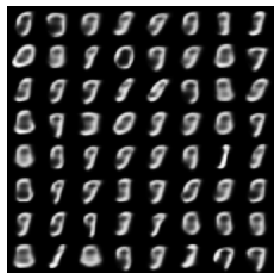

 20%|█▉        | 98/500 [1:26:41<5:55:40, 53.09s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5000000237487257 and for +1: 0.5000000237487257
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.4440000210888684 and for +1: 0.5560000264085829
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.49600002355873585 and for +1: 0.5040000239387155
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.49000002327375114 and for +1: 0.5100000242237002
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5380000255536288 and for +1: 0.4620000219438225
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 99 	 Current ELBO: -377.8022766113281
Saved samples to ./pics/mnist_epoch_98_K_5_N_2_amortize_True.png


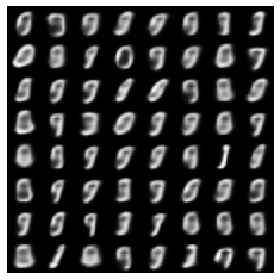

 20%|█▉        | 99/500 [1:27:34<5:54:46, 53.08s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5040000239387155 and for +1: 0.49600002355873585
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5200000246986747 and for +1: 0.4800000227987766
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.49000002327375114 and for +1: 0.5100000242237002
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5000000237487257 and for +1: 0.5000000237487257
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.49400002346374094 and for +1: 0.5060000240337104
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 100 	 Current ELBO: -395.71319580078125
Saved samples to ./pics/mnist_epoch_99_K_5_N_2_amortize_True.png


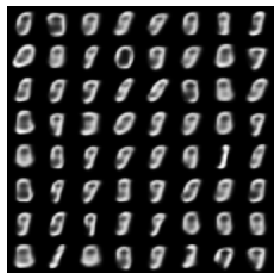

 20%|██        | 100/500 [1:28:27<5:53:53, 53.08s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5280000250786543 and for +1: 0.472000022418797
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5040000239387155 and for +1: 0.49600002355873585
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.48600002308376133 and for +1: 0.51400002441369
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.48600002308376133 and for +1: 0.51400002441369
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.4680000222288072 and for +1: 0.5320000252686441
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 101 	 Current ELBO: -389.3815612792969
Saved samples to ./pics/mnist_epoch_100_K_5_N_2_amortize_True.png


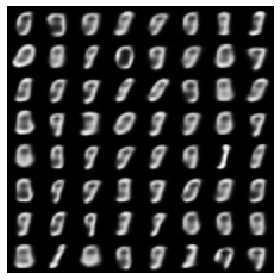

 20%|██        | 101/500 [1:29:20<5:53:01, 53.09s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5100000242237002 and for +1: 0.49000002327375114
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5020000238437206 and for +1: 0.49800002365373075
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.48600002308376133 and for +1: 0.51400002441369
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.4740000225137919 and for +1: 0.5260000249836594
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.49600002355873585 and for +1: 0.5040000239387155
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 102 	 Current ELBO: -386.54132080078125
Saved samples to ./pics/mnist_epoch_101_K_5_N_2_amortize_True.png


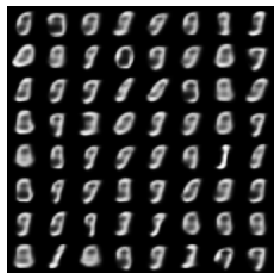

 20%|██        | 102/500 [1:30:14<5:52:13, 53.10s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5280000250786543 and for +1: 0.472000022418797
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.51400002441369 and for +1: 0.48600002308376133
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.472000022418797 and for +1: 0.5280000250786543
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.51400002441369 and for +1: 0.48600002308376133
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.49600002355873585 and for +1: 0.5040000239387155
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 103 	 Current ELBO: -395.3318786621094
Saved samples to ./pics/mnist_epoch_102_K_5_N_2_amortize_True.png


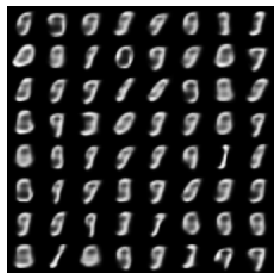

 21%|██        | 103/500 [1:31:07<5:51:20, 53.10s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.49200002336874604 and for +1: 0.5080000241287053
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5080000241287053 and for +1: 0.49200002336874604
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.5300000251736492 and for +1: 0.4700000223238021
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.48800002317875624 and for +1: 0.5120000243186951
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5000000237487257 and for +1: 0.5000000237487257
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 104 	 Current ELBO: -384.69537353515625
Saved samples to ./pics/mnist_epoch_103_K_5_N_2_amortize_True.png


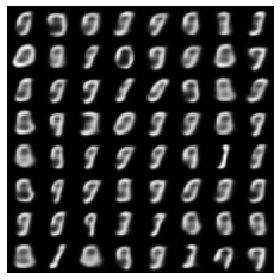

 21%|██        | 104/500 [1:32:00<5:50:26, 53.10s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.49000002327375114 and for +1: 0.5100000242237002
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.49400002346374094 and for +1: 0.5060000240337104
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.5040000239387155 and for +1: 0.49600002355873585
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.49200002336874604 and for +1: 0.5080000241287053
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5180000246036798 and for +1: 0.48200002289377153
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 105 	 Current ELBO: -382.3935241699219
Saved samples to ./pics/mnist_epoch_104_K_5_N_2_amortize_True.png


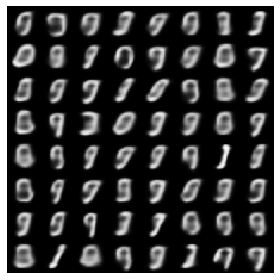

 21%|██        | 105/500 [1:32:53<5:49:34, 53.10s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.534000025363639 and for +1: 0.4660000221338123
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.48800002317875624 and for +1: 0.5120000243186951
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.4680000222288072 and for +1: 0.5320000252686441
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5160000245086849 and for +1: 0.48400002298876643
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5040000239387155 and for +1: 0.49600002355873585
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 106 	 Current ELBO: -375.7551574707031
Saved samples to ./pics/mnist_epoch_105_K_5_N_2_amortize_True.png


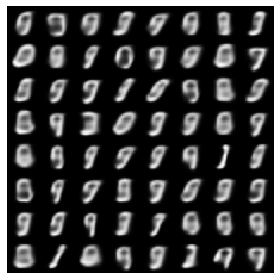

 21%|██        | 106/500 [1:33:46<5:48:41, 53.10s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.4800000227987766 and for +1: 0.5200000246986747
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.49000002327375114 and for +1: 0.5100000242237002
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.4760000226087868 and for +1: 0.5240000248886645
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5020000238437206 and for +1: 0.49800002365373075
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5080000241287053 and for +1: 0.49200002336874604
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 107 	 Current ELBO: -378.3366394042969
Saved samples to ./pics/mnist_epoch_106_K_5_N_2_amortize_True.png


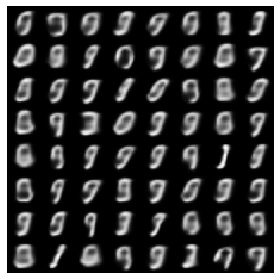

 21%|██▏       | 107/500 [1:34:39<5:47:46, 53.10s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5000000237487257 and for +1: 0.5000000237487257
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.48600002308376133 and for +1: 0.51400002441369
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.472000022418797 and for +1: 0.5280000250786543
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.49800002365373075 and for +1: 0.5020000238437206
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.49000002327375114 and for +1: 0.5100000242237002
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 108 	 Current ELBO: -374.8120422363281
Saved samples to ./pics/mnist_epoch_107_K_5_N_2_amortize_True.png


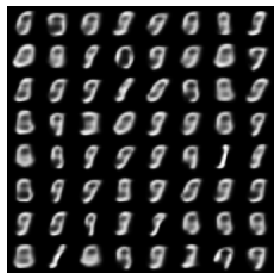

 22%|██▏       | 108/500 [1:35:32<5:46:52, 53.09s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5080000241287053 and for +1: 0.49200002336874604
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5360000254586339 and for +1: 0.4640000220388174
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.49000002327375114 and for +1: 0.5100000242237002
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.4600000218488276 and for +1: 0.5400000256486237
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.49000002327375114 and for +1: 0.5100000242237002
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 109 	 Current ELBO: -382.1934814453125
Saved samples to ./pics/mnist_epoch_108_K_5_N_2_amortize_True.png


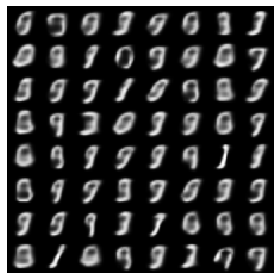

 22%|██▏       | 109/500 [1:36:25<5:46:03, 53.10s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.48400002298876643 and for +1: 0.5160000245086849
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.4560000216588378 and for +1: 0.5440000258386135
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.51400002441369 and for +1: 0.48600002308376133
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.49200002336874604 and for +1: 0.5080000241287053
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5120000243186951 and for +1: 0.48800002317875624
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 110 	 Current ELBO: -382.7865905761719
Saved samples to ./pics/mnist_epoch_109_K_5_N_2_amortize_True.png


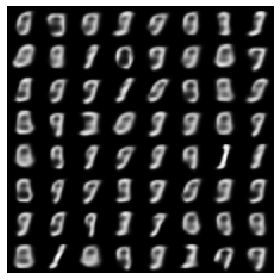

 22%|██▏       | 110/500 [1:37:18<5:45:08, 53.10s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5000000237487257 and for +1: 0.5000000237487257
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5000000237487257 and for +1: 0.5000000237487257
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.4740000225137919 and for +1: 0.5260000249836594
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.48400002298876643 and for +1: 0.5160000245086849
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5320000252686441 and for +1: 0.4680000222288072
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 111 	 Current ELBO: -382.83746337890625
Saved samples to ./pics/mnist_epoch_110_K_5_N_2_amortize_True.png


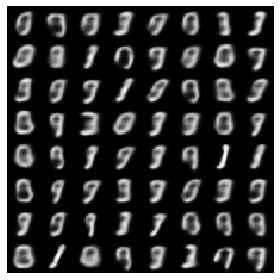

 22%|██▏       | 111/500 [1:38:11<5:44:11, 53.09s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5420000257436186 and for +1: 0.4580000217538327
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.49600002355873585 and for +1: 0.5040000239387155
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.5120000243186951 and for +1: 0.48800002317875624
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.49600002355873585 and for +1: 0.5040000239387155
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5200000246986747 and for +1: 0.4800000227987766
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 112 	 Current ELBO: -399.1648254394531
Saved samples to ./pics/mnist_epoch_111_K_5_N_2_amortize_True.png


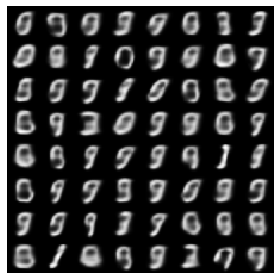

 22%|██▏       | 112/500 [1:39:04<5:43:18, 53.09s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.49800002365373075 and for +1: 0.5020000238437206
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.49800002365373075 and for +1: 0.5020000238437206
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.5180000246036798 and for +1: 0.48200002289377153
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5020000238437206 and for +1: 0.49800002365373075
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5180000246036798 and for +1: 0.48200002289377153
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 113 	 Current ELBO: -374.2308044433594
Saved samples to ./pics/mnist_epoch_112_K_5_N_2_amortize_True.png


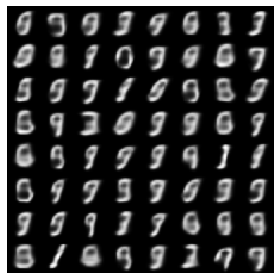

 23%|██▎       | 113/500 [1:39:58<5:42:21, 53.08s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5580000265035778 and for +1: 0.4420000209938735
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5080000241287053 and for +1: 0.49200002336874604
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.5060000240337104 and for +1: 0.49400002346374094
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5380000255536288 and for +1: 0.4620000219438225
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5260000249836594 and for +1: 0.4740000225137919
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 114 	 Current ELBO: -385.7165832519531
Saved samples to ./pics/mnist_epoch_113_K_5_N_2_amortize_True.png


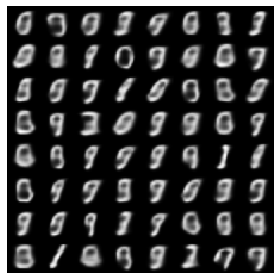

 23%|██▎       | 114/500 [1:40:51<5:41:26, 53.07s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5120000243186951 and for +1: 0.48800002317875624
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.48800002317875624 and for +1: 0.5120000243186951
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.48400002298876643 and for +1: 0.5160000245086849
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5200000246986747 and for +1: 0.4800000227987766
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5320000252686441 and for +1: 0.4680000222288072
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 115 	 Current ELBO: -380.9297790527344
Saved samples to ./pics/mnist_epoch_114_K_5_N_2_amortize_True.png


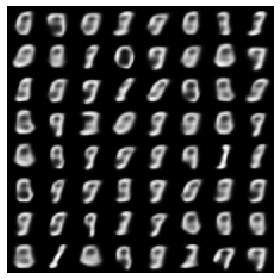

 23%|██▎       | 115/500 [1:41:44<5:40:32, 53.07s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.49200002336874604 and for +1: 0.5080000241287053
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.4700000223238021 and for +1: 0.5300000251736492
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.5300000251736492 and for +1: 0.4700000223238021
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.4760000226087868 and for +1: 0.5240000248886645
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.49400002346374094 and for +1: 0.5060000240337104
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 116 	 Current ELBO: -384.1958923339844
Saved samples to ./pics/mnist_epoch_115_K_5_N_2_amortize_True.png


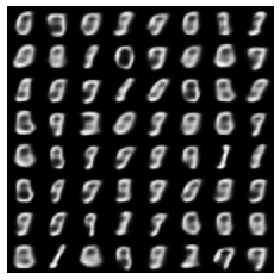

 23%|██▎       | 116/500 [1:42:37<5:39:37, 53.07s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5440000258386135 and for +1: 0.4560000216588378
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.49400002346374094 and for +1: 0.5060000240337104
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.5000000237487257 and for +1: 0.5000000237487257
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.48400002298876643 and for +1: 0.5160000245086849
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5000000237487257 and for +1: 0.5000000237487257
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 117 	 Current ELBO: -385.7369079589844
Saved samples to ./pics/mnist_epoch_116_K_5_N_2_amortize_True.png


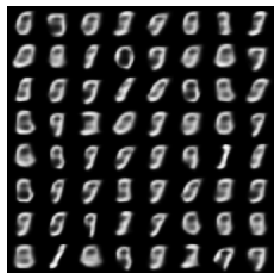

 23%|██▎       | 117/500 [1:43:30<5:38:44, 53.07s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.49800002365373075 and for +1: 0.5020000238437206
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.49000002327375114 and for +1: 0.5100000242237002
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.5100000242237002 and for +1: 0.49000002327375114
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.4500000213738531 and for +1: 0.5500000261235982
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.49000002327375114 and for +1: 0.5100000242237002
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 118 	 Current ELBO: -384.3413391113281
Saved samples to ./pics/mnist_epoch_117_K_5_N_2_amortize_True.png


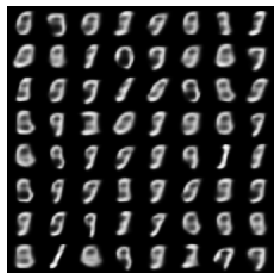

 24%|██▎       | 118/500 [1:44:23<5:37:50, 53.06s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.4700000223238021 and for +1: 0.5300000251736492
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.48200002289377153 and for +1: 0.5180000246036798
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.5060000240337104 and for +1: 0.49400002346374094
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.48200002289377153 and for +1: 0.5180000246036798
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5200000246986747 and for +1: 0.4800000227987766
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 119 	 Current ELBO: -382.7882995605469
Saved samples to ./pics/mnist_epoch_118_K_5_N_2_amortize_True.png


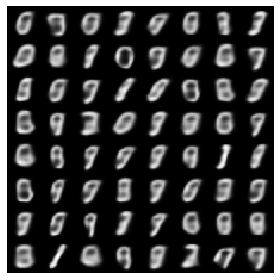

 24%|██▍       | 119/500 [1:45:16<5:36:57, 53.06s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5060000240337104 and for +1: 0.49400002346374094
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5300000251736492 and for +1: 0.4700000223238021
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.4760000226087868 and for +1: 0.5240000248886645
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5320000252686441 and for +1: 0.4680000222288072
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.472000022418797 and for +1: 0.5280000250786543
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 120 	 Current ELBO: -380.5735168457031
Saved samples to ./pics/mnist_epoch_119_K_5_N_2_amortize_True.png


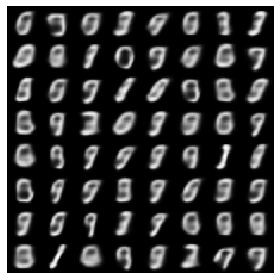

 24%|██▍       | 120/500 [1:46:09<5:36:04, 53.06s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.49200002336874604 and for +1: 0.5080000241287053
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.472000022418797 and for +1: 0.5280000250786543
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.5060000240337104 and for +1: 0.49400002346374094
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5120000243186951 and for +1: 0.48800002317875624
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5060000240337104 and for +1: 0.49400002346374094
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 121 	 Current ELBO: -384.4195556640625
Saved samples to ./pics/mnist_epoch_120_K_5_N_2_amortize_True.png


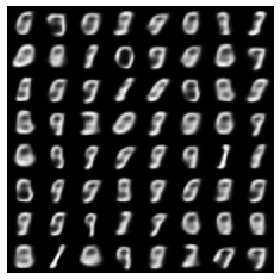

 24%|██▍       | 121/500 [1:47:02<5:35:09, 53.06s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.48600002308376133 and for +1: 0.51400002441369
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5160000245086849 and for +1: 0.48400002298876643
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.5180000246036798 and for +1: 0.48200002289377153
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.4780000227037817 and for +1: 0.5220000247936696
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5040000239387155 and for +1: 0.49600002355873585
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 122 	 Current ELBO: -388.71502685546875
Saved samples to ./pics/mnist_epoch_121_K_5_N_2_amortize_True.png


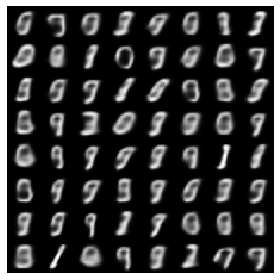

 24%|██▍       | 122/500 [1:47:55<5:34:14, 53.05s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.4620000219438225 and for +1: 0.5380000255536288
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.4780000227037817 and for +1: 0.5220000247936696
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.4800000227987766 and for +1: 0.5200000246986747
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.49800002365373075 and for +1: 0.5020000238437206
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.5020000238437206 and for +1: 0.49800002365373075
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 123 	 Current ELBO: -384.0339660644531
Saved samples to ./pics/mnist_epoch_122_K_5_N_2_amortize_True.png


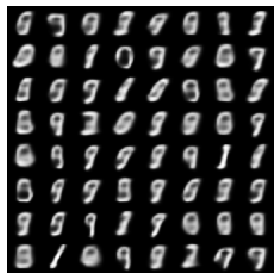

 25%|██▍       | 123/500 [1:48:48<5:33:25, 53.06s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.4580000217538327 and for +1: 0.5420000257436186
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5200000246986747 and for +1: 0.4800000227987766
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.51400002441369 and for +1: 0.48600002308376133
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.49800002365373075 and for +1: 0.5020000238437206
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.4660000221338123 and for +1: 0.534000025363639
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 124 	 Current ELBO: -379.8435974121094
Saved samples to ./pics/mnist_epoch_123_K_5_N_2_amortize_True.png


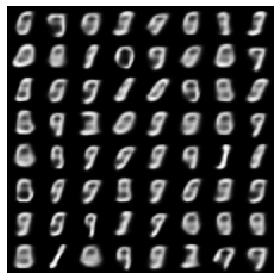

 25%|██▍       | 124/500 [1:49:41<5:32:31, 53.06s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.4600000218488276 and for +1: 0.5400000256486237
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.4760000226087868 and for +1: 0.5240000248886645
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 3 we have for  0: 0.5280000250786543 and for +1: 0.472000022418797
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 4 we have for  0: 0.5200000246986747 and for +1: 0.4800000227987766
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 5 we have for  0: 0.4700000223238021 and for +1: 0.5300000251736492
Stepsize 0.019999998759075654
Autoregression coeff 0.5


KeyboardInterrupt: 

In [8]:
print_info_ = 1

torch_log_2 = torch.tensor(np.log(2.), device=args.device, dtype=args.torchType)


def compute_loss(z_new, p_new, u, p_old, x, sum_log_alpha, sum_log_jac, sum_log_sigma, mu=None):
    log_p = target.get_logdensity(z=z_new, x=x) + args.std_normal.log_prob(p_new).sum(1)
    if args.learnable_reverse:
        log_r = reverse_kernel(z_fin=z_new, mu=mu)
        log_m = args.std_normal.log_prob(u).sum(1) + args.std_normal.log_prob(p_old).sum(1) - sum_log_jac - sum_log_sigma + sum_log_alpha
    else:
        log_r = 0 #-args.K * torch_log_2
        log_m = args.std_normal.log_prob(u).sum(1) + args.std_normal.log_prob(p_old).sum(1) - sum_log_jac - sum_log_sigma # + sum_log_alpha
    
    elbo_full = log_p + log_r - log_m
    grad_elbo = torch.mean(elbo_full + elbo_full.detach() * sum_log_alpha)
    return elbo_full, grad_elbo
  
# with torch.autograd.detect_anomaly():
for ep in tqdm(range(args.num_epoches)): # cycle over epoches
    for b_num, batch_train in enumerate(dataset.next_train_batch()): # cycle over batches

        cond_vectors = [args.std_normal.sample((args.z_dim, )) for _ in range(args.K)]
        optimizer.zero_grad()

        mu, sigma = encoder(batch_train) # sample mu and sigma from encoder
        u = args.std_normal.sample(mu.shape) # sample random tensor for reparametrization trick
        z = mu + sigma * u # reperametrization trick
        p_old = args.std_normal.sample(mu.shape)

        sum_log_alpha = torch.zeros(mu.shape[0], dtype=args.torchType, device=args.device) # for grad log alpha accumulation
        sum_log_jacobian = torch.zeros(mu.shape[0], dtype=args.torchType, device=args.device) # for log_jacobian accumulation
        sum_log_sigma = torch.sum(torch.log(sigma), 1)
        p = p_old
        for k in range(args.K):
            # sample alpha - transition probabilities 
            if args.amortize:
                z, p, log_jac, current_log_alphas, directions, _ = transitions.make_transition(q_old=z, x=batch_train,
                                                    p_old=p, k=cond_vectors[k], target_distr=target)
            else:
                z, p, log_jac, current_log_alphas, directions, _ = transitions[k].make_transition(q_old=z, x=batch_train,
                                                                    p_old=p, k=cond_vectors[k], target_distr=target) # sample a_i -- directions

            if ep  % print_info_ == 0 and b_num % (100 * print_info_) == 0:
                print('On batch number {}/{} and on k = {} we have for  0: {} and for +1: {}'.format(b_num + 1,
                                                                        dataset.train.shape[0] // args['train_batch_size'],
                                                                           k + 1,
                                                    (directions==0.).to(float).mean(),
                                                                    (directions==1.).to(float).mean()))
                if args.amortize:
                    print('Stepsize {}'.format(np.exp(transitions.gamma.cpu().detach().item())))
                    print('Autoregression coeff {}'.format(torch.sigmoid(transitions.alpha_logit).cpu().detach().item()))
            # Accumulate alphas
            sum_log_alpha = sum_log_alpha + current_log_alphas
            sum_log_jacobian = sum_log_jacobian + log_jac  # refresh log jacobian

        elbo_full, grad_elbo = compute_loss(z_new=z, p_new=p, u=u, p_old=p_old, x=batch_train, sum_log_alpha=sum_log_alpha,
                                            sum_log_jac=sum_log_jacobian, sum_log_sigma=sum_log_sigma, mu=mu)
    #     pdb.set_trace()
        (-grad_elbo).backward()
        optimizer.step()
        optimizer.zero_grad()
        # Bias squared
    if ep % print_info_ == 0:
        print('Current epoch:', (ep + 1), '\t', 'Current ELBO:', elbo_full.detach().mean().item())
        plot_digit_samples(samples=get_samples(target.decoder, random_code), args=args, epoch=ep)

In [ ]:
print('a')

In [ ]:
elbo_full.mean()